<a href="https://colab.research.google.com/github/DIPANJAN001/TalkJulia_with_Randy/blob/main/compare1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install Boruta
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import concatenate
from keras import Model
from keras.layers import Input
from keras.layers import Bidirectional
from keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input
from sklearn.decomposition import PCA 
from sklearn.metrics import mean_absolute_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)


In [3]:
df=pd.read_excel("/content/pv_02.xlsx")
weather_input1=df.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [4]:
def lstm_data_transform(x_data, y_data, num_steps):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [5]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Input

In [6]:
n_inputs=weather_input.shape[1]

In [7]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [8]:
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [9]:
 model.fit(weather_input,weather_input, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
197/197 - 2s - loss: 0.0872 - 2s/epoch - 11ms/step
Epoch 2/100
197/197 - 1s - loss: 0.0193 - 530ms/epoch - 3ms/step
Epoch 3/100
197/197 - 0s - loss: 0.0147 - 483ms/epoch - 2ms/step
Epoch 4/100
197/197 - 1s - loss: 0.0131 - 686ms/epoch - 3ms/step
Epoch 5/100
197/197 - 0s - loss: 0.0113 - 473ms/epoch - 2ms/step
Epoch 6/100
197/197 - 0s - loss: 0.0108 - 485ms/epoch - 2ms/step
Epoch 7/100
197/197 - 1s - loss: 0.0098 - 525ms/epoch - 3ms/step
Epoch 8/100
197/197 - 1s - loss: 0.0095 - 526ms/epoch - 3ms/step
Epoch 9/100
197/197 - 0s - loss: 0.0090 - 468ms/epoch - 2ms/step
Epoch 10/100
197/197 - 0s - loss: 0.0085 - 476ms/epoch - 2ms/step
Epoch 11/100
197/197 - 1s - loss: 0.0084 - 503ms/epoch - 3ms/step
Epoch 12/100
197/197 - 0s - loss: 0.0082 - 493ms/epoch - 3ms/step
Epoch 13/100
197/197 - 1s - loss: 0.0076 - 507ms/epoch - 3ms/step
Epoch 14/100
197/197 - 1s - loss: 0.0076 - 684ms/epoch - 3ms/step
Epoch 15/100
197/197 - 1s - loss: 0.0074 - 1s/epoch - 6ms/step
Epoch 16/100
197/197 - 1

In [10]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [11]:
#solpow=solpow.to_numpy().reshape(-1,1)
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

197/197 [==============================] - 0s 1ms/step


In [12]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(weather_input)

197/197 [==============================] - 0s 1ms/step


In [13]:
num_steps = 2
# training set
(x_transformed1,
 y_transformed1) = lstm_data_transform(X_train_encode,solpow , num_steps=num_steps)
assert x_transformed1.shape[0] == y_transformed1.shape[0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed1, y_transformed1, test_size=0.4, random_state=42,shuffle=False)

In [15]:
inputs1=Input(shape=(X_train.shape[1],X_train.shape[2]))

In [16]:
from keras import optimizers
opt=optimizers.Adam(learning_rate=0.001)

Epoch 1/100
48/48 [==============================] - 13s 61ms/step - loss: 0.0244 - mse: 0.0244 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 2/100
48/48 [==============================] - 2s 34ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 3/100
48/48 [==============================] - 3s 62ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 4/100
48/48 [==============================] - 2s 46ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 5/100
48/48 [==============================] - 2s 35ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 6/100
48/48 [==============================] - 2s 35ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 7/100
48/48 [==============================] - 2s 34ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 8/100
48/48 [==============================] - 2s 34ms/step - loss: 0

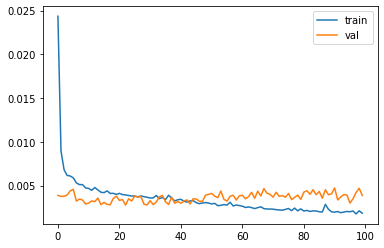

79/79 [==============================] - 2s 6ms/step


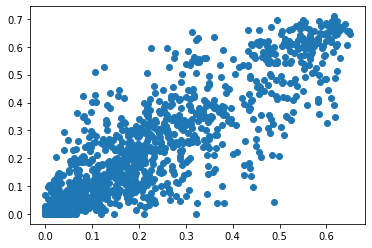

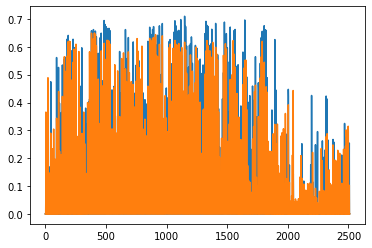

0.07080488647528455


In [17]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.5)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.5)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 100,validation_split=0.2,batch_size =64 )
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))

Epoch 1/200
48/48 [==============================] - 14s 59ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 2/200
48/48 [==============================] - 2s 33ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 3/200
48/48 [==============================] - 2s 34ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 4/200
48/48 [==============================] - 2s 33ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/200
48/48 [==============================] - 2s 47ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/200
48/48 [==============================] - 2s 40ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 7/200
48/48 [==============================] - 3s 73ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 8/200
48/48 [==============================] - 2s 33ms/step - loss: 0

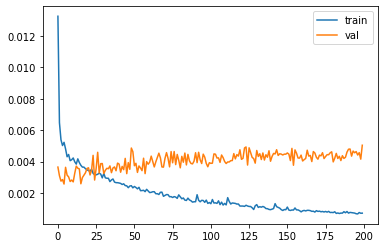

79/79 [==============================] - 2s 6ms/step


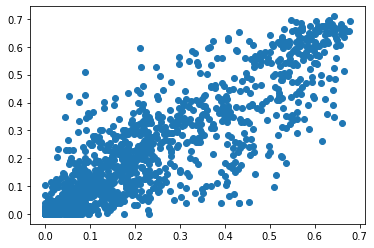

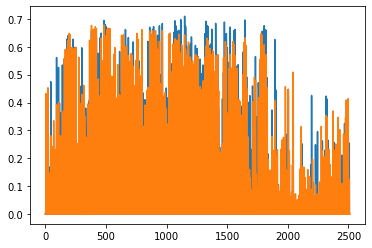

0.07412889885591432
0.036906756454801154


In [18]:
def define_model():


  # firs
  fe1_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = LSTM(24, activation='relu',return_sequences = True)(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=LSTM(30, activation='relu')(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = LSTM(208, activation='relu',return_sequences = True)(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = LSTM(60, activation='relu',return_sequences = True)(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=LSTM(4, activation='relu')(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =LSTM(104, activation='relu',return_sequences = True)(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = LSTM(96, activation='relu',return_sequences = True)(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=LSTM(8, activation='relu')(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs = 200,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [19]:
from keras.layers import Bidirectional


Epoch 1/100
48/48 [==============================] - 27s 130ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/100
48/48 [==============================] - 4s 77ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 3/100
48/48 [==============================] - 4s 92ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/100
48/48 [==============================] - 5s 94ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 5/100
48/48 [==============================] - 4s 80ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/100
48/48 [==============================] - 6s 122ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 7/100
48/48 [==============================] - 4s 75ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 8/100
48/48 [==============================] - 4s 75ms/step - loss:

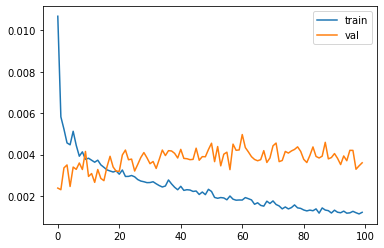

79/79 [==============================] - 3s 12ms/step


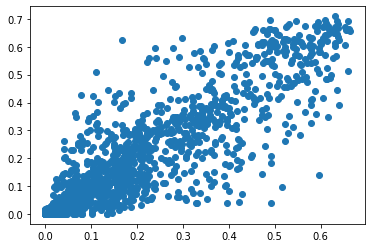

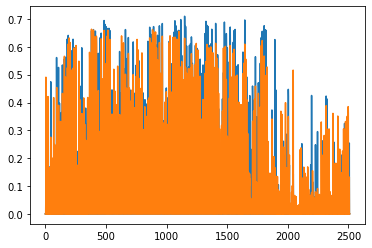

0.07286614437982153
0.036071362411331354


In [20]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  output = layers.average([ out1_1, out2_1, out3_1])
  #merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  #output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

Epoch 1/100
48/48 [==============================] - 27s 138ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 2/100
48/48 [==============================] - 4s 75ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 3/100
48/48 [==============================] - 4s 74ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 12/100
48/48 [==============================] - 4s 75ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 13/100
48/48 [==============================] - 4s 74ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 14/100
48/48 [==============================] - 4s 74ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 15/100
48/48 [==============================] - 4s 74ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 16/100
48/48 [==============================] - 4s 75ms/step - l

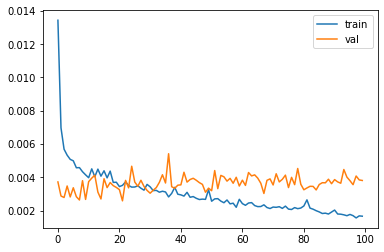

79/79 [==============================] - 3s 13ms/step


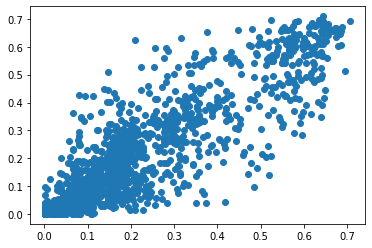

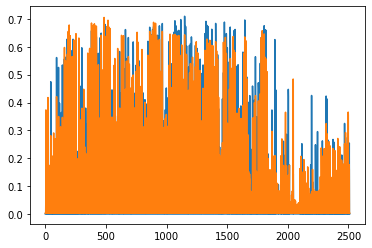

0.07126194957644155
0.03693739746755135


In [21]:
def define_model():


  # firs
  fe1_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe1_1 = Dropout(0.5)(fe1_0)
  fe1_2 = Bidirectional(LSTM(24, activation='relu',return_sequences = True))(fe1_1)
  fe1_3= Dropout(0.2)(fe1_2)
  fe1_4=Bidirectional(LSTM(30, activation='relu'))(fe1_3)
  out1_1=Dense(1, activation='relu')(fe1_4)



  fe2_0 = Bidirectional(LSTM(208, activation='relu',return_sequences = True))(inputs1)
  fe2_1 = Dropout(0.6)(fe2_0)
  fe2_2 = Bidirectional(LSTM(60, activation='relu',return_sequences = True))(fe2_1)
  fe2_3= Dropout(0.5)(fe2_2)
  fe2_4=Bidirectional(LSTM(4, activation='relu'))(fe2_3)
  out2_1=Dense(1, activation='relu')(fe2_4)

  fe3_0 =Bidirectional(LSTM(104, activation='relu',return_sequences = True))(inputs1)
  fe3_1 = Dropout(0.6)(fe3_0)
  fe3_2 = Bidirectional(LSTM(96, activation='relu',return_sequences = True))(fe3_1)
  fe3_3= Dropout(0.5)(fe3_2)
  fe3_4=Bidirectional(LSTM(8, activation='relu'))(fe3_3)#16
  out3_1=Dense(1, activation='relu')(fe3_4)
 
 

  #output = layers.average([ out1_1, out2_1, out3_1])
  merged3 = concatenate([out1_1,out2_1,out3_1], name='concat3')
  output = Dense(1, activation='relu')( merged3)
  

  model = Model(inputs=[inputs1], outputs=[output])
  model.compile(optimizer=opt,loss='mean_squared_error',metrics=['mse'])
 
  return model
mdl=define_model()
history=mdl.fit(X_train, y_train, epochs =100,validation_split=0.2,batch_size =64)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()
y=mdl.predict(X_test)
plt.scatter(y,y_test)
plt.show()
df = pd.DataFrame()
df['time']=[i for i in range(len(y))]
df['Actual']=y_test
df['Predicted']=y
plt.plot(df['time'],df['Actual'])
plt.plot(df['time'],df['Predicted'])
plt.show()
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

In [22]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(2,20)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))

In [30]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 2, 20)             820       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1,662
Trainable params: 1,662
Non-trainable params: 0
_________________________________________________________________


In [31]:
SimRNN.fit(X_train,y_train, epochs=200, batch_size=64, validation_split = 0.2)

Epoch 1/200
48/48 [==============================] - 3s 12ms/step - loss: 0.3197 - mean_absolute_error: 0.3197 - val_loss: 0.1645 - val_mean_absolute_error: 0.1645
Epoch 2/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - val_loss: 0.1179 - val_mean_absolute_error: 0.1179
Epoch 3/200
48/48 [==============================] - 0s 4ms/step - loss: 0.1129 - mean_absolute_error: 0.1129 - val_loss: 0.0971 - val_mean_absolute_error: 0.0971
Epoch 4/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - val_loss: 0.0813 - val_mean_absolute_error: 0.0813
Epoch 5/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - val_loss: 0.0723 - val_mean_absolute_error: 0.0723
Epoch 6/200
48/48 [==============================] - 0s 4ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - val_loss: 0.0729 - val_mean_absolute_error: 0.0729
Epoch 7/200
48/48 [==

In [33]:
y=SimRNN.predict(X_test)

79/79 [==============================] - 0s 2ms/step


In [34]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.07297225766162412
0.04182137619242534


In [35]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (2,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
59/59 [==============================] - 7s 10ms/step - loss: 0.0174
Epoch 2/200
59/59 [==============================] - 1s 10ms/step - loss: 0.0072
Epoch 3/200
59/59 [==============================] - 1s 10ms/step - loss: 0.0061
Epoch 4/200
59/59 [==============================] - 1s 10ms/step - loss: 0.0058
Epoch 5/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0056
Epoch 6/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0055
Epoch 7/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0055
Epoch 8/200
59/59 [==============================] - 1s 10ms/step - loss: 0.0049
Epoch 9/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0049
Epoch 10/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0047
Epoch 11/200
59/59 [==============================] - 1s 10ms/step - loss: 0.0046
Epoch 12/200
59/59 [==============================] - 1s 9ms/step - loss: 0.0045
Epoch 13/200
59/59 [===========

In [36]:
y=regressor1.predict(X_test)

79/79 [==============================] - 2s 3ms/step


In [37]:
print(np.sqrt(mean_squared_error(y,y_test)))
print(mean_absolute_error(y, y_test))

0.07453154736238424
0.03836073350408513
